In [1]:
import cv2
from matplotlib import pyplot as plt
from mtcnn import MTCNN

%matplotlib inline

Using TensorFlow backend.


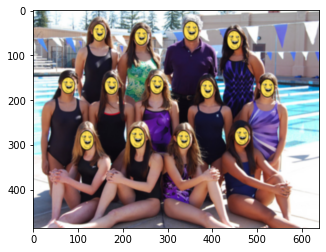

True

In [2]:
# load the photography
pixels = cv2.cvtColor(cv2.imread('../resources/input_images/1.jpg'), cv2.COLOR_BGR2RGB)
# load the yobaface
yoba = cv2.cvtColor(cv2.imread('../resources/input_images/yoba.png', cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)
# load the pre-trained model
detector = MTCNN()
# perform face detection
bboxes = detector.detect_faces(pixels)
# print bounding box for each detected face
for bbox in bboxes:
  # extract
  box, confidence, keypoints = bbox.values()
  left_eye, right_eye, nose, mouth_left, mouth_right = keypoints.values()
  x, y, width, height = box
  x2, y2 = x + width, y + height
  # add yobaface instead original faces
  yo = cv2.resize(yoba, dsize=(width, height), interpolation=cv2.INTER_AREA)
  alpha_s = yo[:, :, 3] / 255.0
  alpha_l = 1.0 - alpha_s
  for c in range(0, 3):
    pixels[y:y2, x:x2, c] = (alpha_s * yo[:, :, c] + alpha_l * pixels[y:y2, x:x2, c])
  # cv2.circle(img=pixels, center=nose, radius=5, color=(255,0,0), thickness=5)
# show the result
plt.imshow(pixels, cmap = None, interpolation = 'bicubic')
plt.show()
cv2.imwrite('../resources/output_images/1.jpg', cv2.cvtColor(pixels, cv2.COLOR_RGBA2BGRA))